In [108]:

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import joblib


In [72]:
df = pd.read_csv("../input/advertising.csv")
df.head(200)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


## Data Inspection

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [74]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [75]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120]), <a list of 121 Text xticklabel objects>)

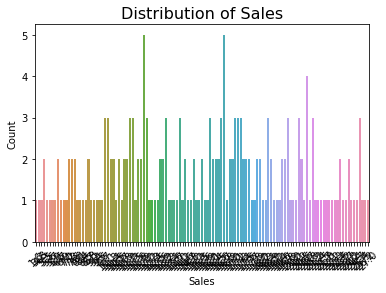

In [76]:


  # Set the figure size
ax = sns.countplot(x="Sales", data=df)

# Add title and labels
plt.title("Distribution of Sales", fontsize=16)  # Title of the plot
plt.xlabel("Sales")  # Label for the x-axis
plt.ylabel("Count" )  # Label for the y-axis

# Optionally, add rotation to x-axis labels if they overlap
plt.xticks(rotation=45)

Text(0,0.5,'Count')

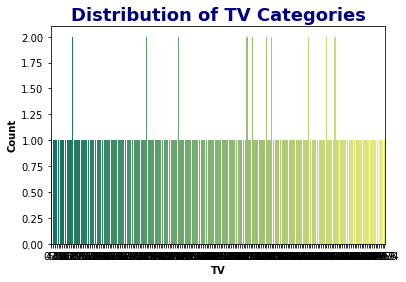

In [77]:
ax = sns.countplot(x="TV", data=df, palette="summer")

# Adding title and axis labels with customized font size
plt.title("Distribution of TV Categories", fontsize=18, fontweight='bold', color='navy')  # Title with custom font weight and color
plt.xlabel("TV", fontweight='bold')  # x-axis label with custom font size and weight
plt.ylabel("Count", fontweight='bold')

Text(0,0.5,'Count')

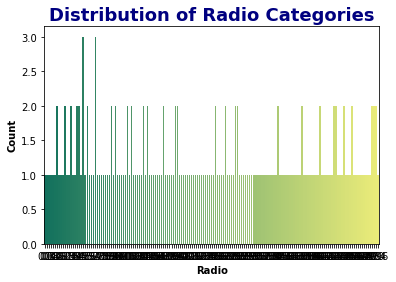

In [78]:

sns.countplot(x="Radio", data=df, palette="summer")

plt.title("Distribution of Radio Categories", fontsize=18, fontweight='bold', color='navy')  # Title with custom font weight and color
plt.xlabel("Radio", fontweight='bold')  # x-axis label with custom font size and weight
plt.ylabel("Count", fontweight='bold')

Text(0,0.5,'Count')

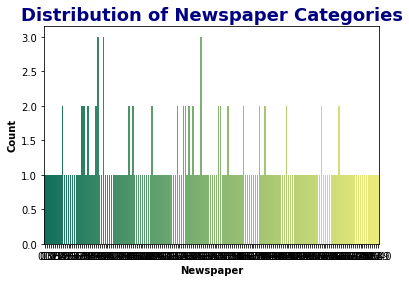

In [79]:
sns.countplot(x="Newspaper", data=df, palette="summer")

plt.title("Distribution of Newspaper Categories", fontsize=18, fontweight='bold', color='navy')  # Title with custom font weight and color
plt.xlabel("Newspaper", fontweight='bold')  # x-axis label with custom font size and weight
plt.ylabel("Count", fontweight='bold')

In [80]:

# Handle missing data if any
if df.isnull().sum().any():
    df.fillna(df.mean(), inplace=True)  # Impute missing values with the column mean (for numeric columns)
    print("Missing values imputed.")
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


In [81]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [82]:
x=df.drop('Sales',axis=1)
y=df["Sales"]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [83]:

# Feature Scaling (Standardize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [84]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
5       7.2
6      11.8
7      13.2
8       4.8
9      15.6
10     12.6
11     17.4
12      9.2
13     13.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     17.5
22      5.6
23     20.5
24      9.7
25     17.0
26     15.0
27     20.9
28     18.9
29     10.5
       ... 
170     8.4
171    17.5
172     7.6
173    16.7
174    16.5
175    27.0
176    20.2
177    16.7
178    16.8
179    17.6
180    15.5
181    17.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    20.9
189     6.7
190    10.8
191    11.9
192     5.9
193    19.6
194    17.3
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [92]:

# Train-Test Split (Set random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [93]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data (avoid data leakage)


In [94]:
# 8) Create and Train the Model
# Use Ridge Regression with regularization (optional)
lr = Ridge(alpha=1.0)  # alpha controls the regularization strength
lr.fit(X_train, y_train)




Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
print("Model Coefficients:", lr.coef_)  # Coefficients of each feature
print("Model Intercept:", lr.intercept_)  # Intercept term



Model Coefficients: [4.64588428 1.46766366 0.09724517]
Model Intercept: 15.227060169569622


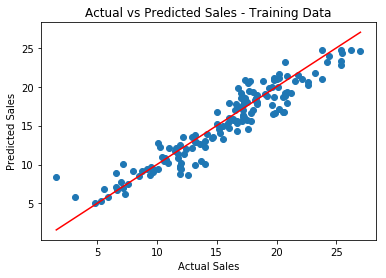

In [96]:
y_train_pred = lr.predict(X_train_scaled)
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Identity line
plt.title("Actual vs Predicted Sales - Training Data")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()



In [98]:

res = y_train - y_train_pred
res




114    1.146886
173    2.330058
5     -2.844179
126   -2.292151
117    0.682503
73    -1.182403
140    0.755392
98     0.727500
172    0.076852
96     1.118684
169   -1.034239
97     3.809769
31    -0.568772
12    -0.265193
35    -2.952566
119   -0.532101
42    -2.511310
189   -0.013656
90     1.731763
136   -0.182685
51    -0.148778
127    3.079737
162    3.287595
41    -0.461076
118    0.612613
113    2.949475
26    -0.165306
139    1.843038
100   -0.525430
111    0.313371
         ...   
48     1.175095
88     0.814767
21    -0.502337
57    -0.619355
160    0.634546
192    0.020230
129    0.663126
37     1.129042
157   -2.732236
193    1.913259
1     -0.516098
52     2.056524
149    0.621908
130   -6.775187
151   -0.470898
103    3.240133
99     1.074767
116   -1.341977
87     1.244051
74    -1.565130
121   -0.794584
199    0.411875
20    -1.334931
188   -0.540657
71     0.439758
106    0.220266
14    -0.030495
92    -0.495920
179    3.074354
102   -1.030856
Name: Sales, Length: 150

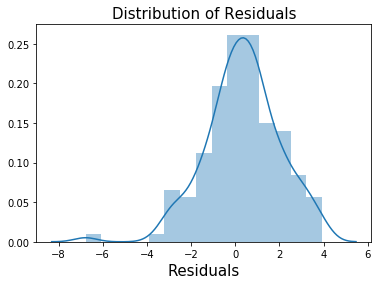

In [100]:

# Plot distribution of residuals
fig = plt.figure()
sns.distplot(res, bins=15, kde=True)

plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residuals', fontsize=15)
plt.show()




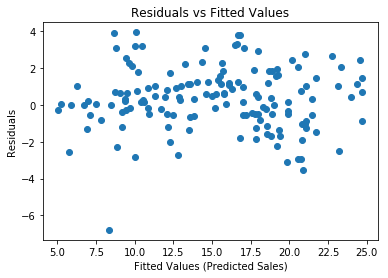

In [101]:

# Plot residuals vs fitted values
plt.scatter(y_train_pred, res)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals')
plt.show()



In [102]:

y_pred = lr.predict(X_test_scaled)



In [103]:


# Print the first few predictions
print(y_pred[:10])



[16.69964151 20.04848913 23.42708657  8.88278832 21.30695287 12.20325024
 20.72436314  8.35525017 16.96379314 16.34631133]


In [104]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 1.5094963288355934


In [105]:
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)



R-squared: 0.9161809425677083


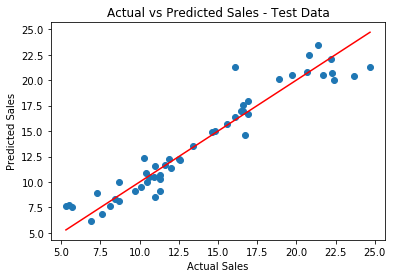

In [106]:

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.title("Actual vs Predicted Sales - Test Data")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()



In [110]:
joblib.dump(lr, 'sales_prediction_model.pkl')  # Save the model

['sales_prediction_model.pkl']